# Imports

In [1]:
%matplotlib notebook

from IPython.display import clear_output

import sys
sys.path.append(r"D:\OneDrive\BF3\Code");
sys.path.append(r"D:\OneDrive\BF3\Code\labtools-master")

import os
import time
import datetime
import numpy as np
import matplotlib as mpl
import time
# import utils

from collections import OrderedDict
from importlib import reload
from matplotlib import pyplot as plt

# from labtools import mplplots; reload(mplplots)
# from labtools.mplplots.init_nb_plotting import *
# from labtools.mplplots import tools as mpltools

import qcodes as qc
from qcodes.dataset.database import initialise_database, get_DB_location

#qc.config.subscription.default_subscribers  = ["Plottr"] # use plottr as the live plotting tool

from qcodes import new_experiment, Station, Instrument
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import DataSet
from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.data_export import get_data_by_id

from pytopo.qctools import instruments as instools

#from v2_dataset_tools.experiments import do_experiment, get_results_from_db_path

# from MDAC import MDAC 
# from qcodes.instrument_drivers.Keysight.Keysight_34465A import Keysight_34465A

#from qcodes.instrument_drivers.stanford_research.SR860 import SR860
#from qcodes.instrument_drivers.QuTech.IVVI import IVVI
#from qcodes.instrument_drivers.yokogawa.GS200 import GS200

from pytopo.sweep import sweep, measure, nest, chain, szip, getter, setter, time_trace, do_experiment
from pytopo.qctools.instruments import create_inst
from pytopo.qctools.dataset2 import select_experiment

from pytopo.qctools.instruments import create_inst
from pytopo.qctools.dataset2 import select_experiment
#qc.config.subscription.default_subscribers.pop()
qc.config.subscription.default_subscribers

[]

In [2]:
qc.config["core"]["db_location"] = r'D:\OneDrive\BF3\Data\experiments_2019-03-26.db'#datetime.date.today().strftime(r'D:\OneDrive\BF3\Data\experiments_%Y-%m-%d.db')
# automatically uses a different DB file for each month
initialise_database()

# Measurement plots
## Critical temperature

In [22]:
dat=load_by_id(5)

In [23]:
T = pars[1]
R_1_real = pars[2]
R_2_real = pars[4]
R_2_imag = pars[5]

In [28]:
R = np.array(dat.get_values(R_2_real.name))[:,0]

<IPython.core.display.Javascript object>


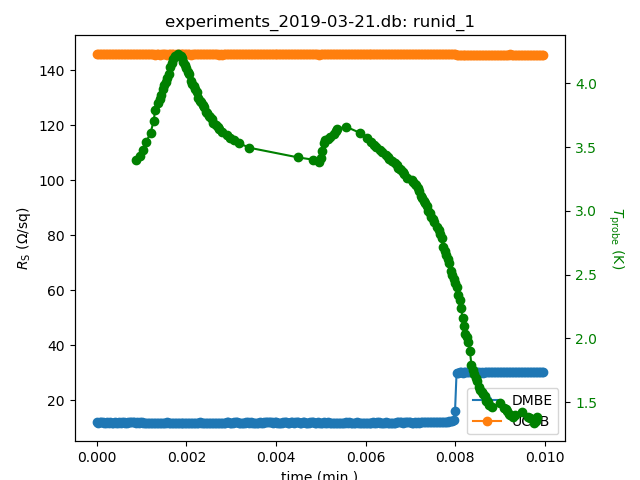

Text(0.5,23.5222,'time (min.)')

In [3]:
dbpth = 'experiments_2019-03-26.db'
dat= load_by_id(3)
pars = dat.get_parameters()
c = pars[0]
T = pars[1]
RMBE = pars[2]
RMOVPE = pars[3]
ind = 300
cs = np.array(dat.get_values(c.name))[:ind,0]*10/60
Ts = np.array(dat.get_values(T.name))[:ind,0]
RMBE = np.array(dat.get_values(RMBE.name))[:ind,0]*np.pi/np.log(2)
RMOVPE = np.array(dat.get_values(RMOVPE.name))[:ind,0]*np.pi/np.log(2)
fig, ax1 = plt.subplots()
ax1.set_title('experiments_2019-03-21.db: runid_1')

ax1.plot(cs, RMBE,'-o',label = 'DMBE')
ax1.plot(cs, RMOVPE,'-o',label = 'UCSB')
plt.ylabel(r'$R_\mathrm{S}$ ($\Omega/$sq)')
ax2 = ax1.twinx()
sel = np.abs(np.diff(Ts))>0.01
ax2.plot(cs[:-1][sel], Ts[:-1][sel], 'go-')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylabel(r'$T_\mathrm{probe}$ (K)', color = 'g', rotation = -90,labelpad=20)#, pad = 30 )
#ax2.plot(np.diff(Ts))
ax1.legend()
plt.tight_layout()
ax1.set_xlabel('time (min.)')

<IPython.core.display.Javascript object>


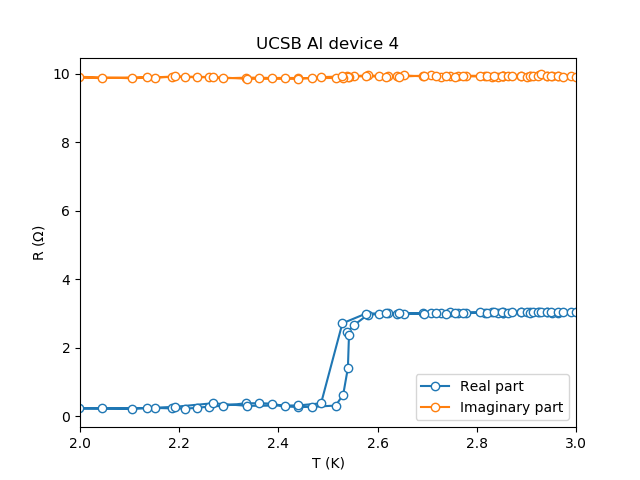

(2.0, 3)

In [35]:
plt.figure('T vs R')
plt.plot(T, R, 'o-', mfc='white')
plt.plot(T, C, 'o-', mfc='white')
plt.xlabel('T (K)')
plt.ylabel('R ($\Omega$)')
plt.legend(['Real part', 'Imaginary part'])
plt.title('UCSB Al device 4')
plt.xlim((2.0, 3))

In [19]:
dat_test = load_by_id(2)
dat_test.get_parameters()
test_vector = np.array(dat_test.get_values(dat_test.get_parameters()[1].name))

In [21]:
do_experiment()

[ParamSpec('time', 'numeric', 'time', 'a.u.', inferred_from=[], depends_on=[]),
 ParamSpec('Temperature', 'numeric', 'Temperature', 'K', inferred_from=[], depends_on=['time']),
 ParamSpec('R_1_real', 'numeric', 'R_1_real', 'Ohm', inferred_from=[], depends_on=['time']),
 ParamSpec('R_1_imag', 'numeric', 'R_1_imag', 'Ohm', inferred_from=[], depends_on=['time']),
 ParamSpec('R_2_real', 'numeric', 'R_2_real', 'Ohm', inferred_from=[], depends_on=['time']),
 ParamSpec('R_2_imag', 'numeric', 'R_2_imag', 'Ohm', inferred_from=[], depends_on=['time']),
 ParamSpec('Lockin1_R', 'numeric', 'Lockin1_R', 'V', inferred_from=[], depends_on=['time']),
 ParamSpec('Lockin1_P', 'numeric', 'Lockin1_P', 'deg', inferred_from=[], depends_on=['time']),
 ParamSpec('Lockin2_R', 'numeric', 'Lockin2_R', 'V', inferred_from=[], depends_on=['time']),
 ParamSpec('Lockin2_P', 'numeric', 'Lockin2_P', 'deg', inferred_from=[], depends_on=['time']),
 ParamSpec('I_exc_1', 'numeric', 'I_exc_1', 'A', inferred_from=[], depends_

## Perpendicular field

<IPython.core.display.Javascript object>


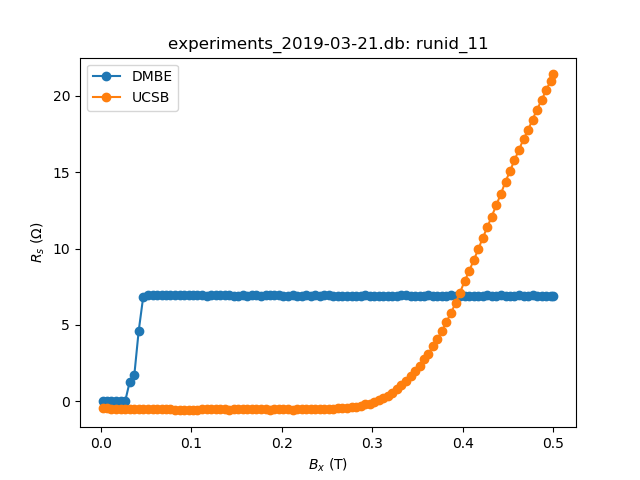

In [190]:
dbpth = 'experiments_2019-03-21.db'

dat= load_by_id(11)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))
plt.figure()
ax1 = plt.subplot()
ax1.set_title('experiments_2019-03-21.db: runid_11')
plt.plot(np.array(dat.get_values(Bxs.name)), np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4', label = 'DMBE')
plt.plot(np.array(dat.get_values(Bxs.name)), np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e', label = 'UCSB')
plt.xlabel('$B_x$ (T)')
plt.ylabel('$R_s$ ($\Omega$)')
plt.legend()

<IPython.core.display.Javascript object>


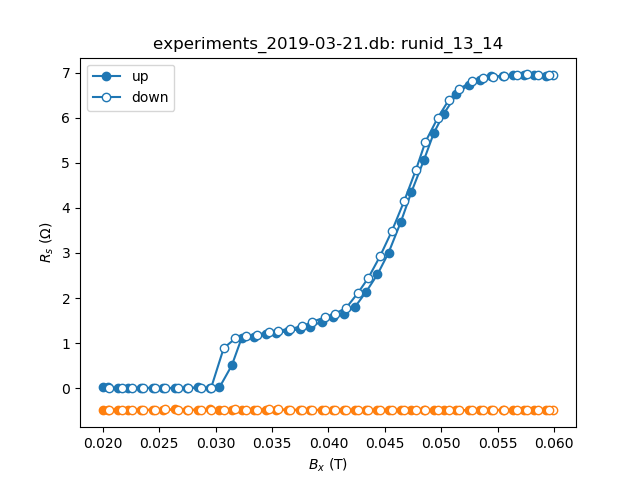

In [180]:
plt.figure()
ax1 = plt.subplot()
ax1.set_title('experiments_2019-03-21.db: runid_13_14')
dbpth = 'experiments_2019-03-21.db'
dat= load_by_id(13)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))

plt.plot(np.array(dat.get_values(Bxs.name)), np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4', label = 'up')
plt.plot(np.array(dat.get_values(Bxs.name)), np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e')
plt.xlabel('$B_x$ (T)')
plt.ylabel('$R_s$ ($\Omega$)')

dat= load_by_id(14)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))

plt.plot(np.array(dat.get_values(Bxs.name)), np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4', mfc = 'white', label = 'down')
plt.plot(np.array(dat.get_values(Bxs.name)), np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e', mfc = 'white')
plt.xlabel('$B_x$ (T)')
plt.ylabel('$R_s$ ($\Omega$)')
plt.legend()

## Parralel field

<IPython.core.display.Javascript object>


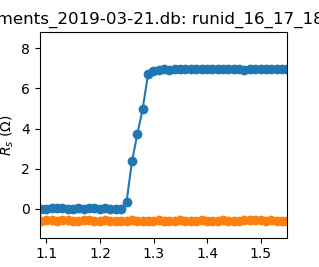

Text(0,0.5,'$R_s$ ($\\Omega$)')

In [186]:
plt.figure()
ax1 = plt.subplot()
ax1.set_title('experiments_2019-03-21.db: runid_16_17_18_19_20')
dbpth = 'experiments_2019-03-21.db'
dat= load_by_id(15)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
Bzs = pars[3]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))
Bzs_arr = np.sqrt(np.array(dat.get_values(Bzs.name))**2+np.array(dat.get_values(Bxs.name))**2)
plt.plot(Bzs_arr, np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4')
plt.plot(Bzs_arr, np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e')
plt.xlabel('$B_z$ (T)')

plt.ylabel('$R_s$ ($\Omega$)')

dbpth = 'experiments_2019-03-21.db'
dat= load_by_id(16)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
Bzs = pars[3]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))
Bzs_arr = np.sqrt(np.array(dat.get_values(Bzs.name))**2+np.array(dat.get_values(Bxs.name))**2)
plt.plot(Bzs_arr, np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4')
plt.plot(Bzs_arr, np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e')
plt.xlabel('$B_z$ (T)')

plt.ylabel('$R_s$ ($\Omega$)')

dat= load_by_id(17)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
Bzs = pars[3]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))
Bzs_arr = np.sqrt(np.array(dat.get_values(Bzs.name))**2+np.array(dat.get_values(Bxs.name))**2)
plt.plot(Bzs_arr, np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4')
plt.plot(Bzs_arr, np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e')
plt.xlabel('$B_z$ (T)')

plt.ylabel('$R_s$ ($\Omega$)')

dat= load_by_id(18)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
Bzs = pars[3]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))
Bzs_arr = np.sqrt(np.array(dat.get_values(Bzs.name))**2+np.array(dat.get_values(Bxs.name))**2)
plt.plot(Bzs_arr, np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4')
plt.plot(Bzs_arr, np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e')
plt.xlabel('$B_z$ (T)')

plt.ylabel('$R_s$ ($\Omega$)')



dat= load_by_id(19)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
Bzs = pars[3]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))
Bzs_arr = np.sqrt(np.array(dat.get_values(Bzs.name))**2+np.array(dat.get_values(Bxs.name))**2)
plt.plot(Bzs_arr, np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4')
plt.plot(Bzs_arr, np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e')
plt.xlabel('$B_z$ (T)')

plt.ylabel('$R_s$ ($\Omega$)')

dat= load_by_id(20)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
Bzs = pars[3]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))
Bzs_arr = np.sqrt(np.array(dat.get_values(Bzs.name))**2+np.array(dat.get_values(Bxs.name))**2)
plt.plot(Bzs_arr, np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4')
plt.plot(Bzs_arr, np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e')
plt.xlabel('$B_z$ (T)')

plt.ylabel('$R_s$ ($\Omega$)')

dat= load_by_id(21)
pars = dat.get_parameters()
Ts=pars[0]
Bxs = pars[1]
Bzs = pars[3]
R_MBEs = pars[7]
R_MOVPEs = pars[8]

np.array(dat.get_values(Ts.name))
Bzs_arr = np.sqrt(np.array(dat.get_values(Bzs.name))**2+np.array(dat.get_values(Bxs.name))**2)
plt.plot(Bzs_arr, np.array(dat.get_values(R_MBEs.name)), 'o-', color = '#1f77b4')
plt.plot(Bzs_arr, np.array(dat.get_values(R_MOVPEs.name)), 'o-', color = '#ff7f0e')
plt.xlabel('$B_z$ (T)')

plt.ylabel('$R_s$ ($\Omega$)')




<IPython.core.display.Javascript object>


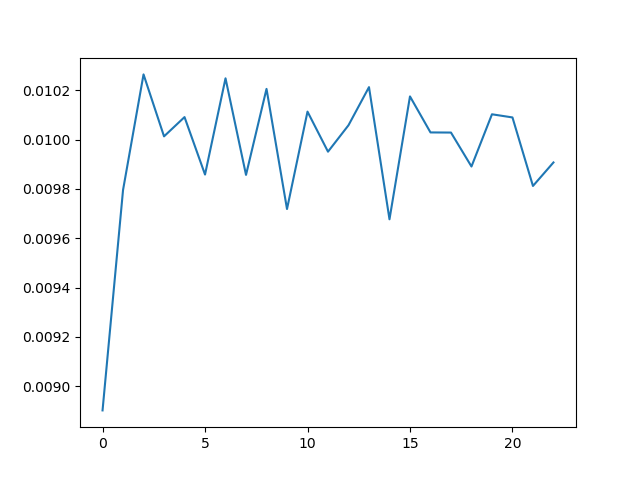

In [96]:
plt.figure()
plt.plot(np.diff(Bzs_arr[:,0]))

In [158]:
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']